# Trabajo Practico 2 - Matrices de Insumo Producto

## Enunciado

### Consigna 1 -

Queremos demostrar que si se cumple la siguiente igualdad:

$$
(\mathbf{I - A})^{-1} = \mathbf{I} + \mathbf{A} + \mathbf{A^{2}} + \ldots + \mathbf{A^{n}} + \ldots
$$

Entonces vale que:

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = 0
$$

Definimos:

$$
S_n = \mathbf{I} + \mathbf{A} + \mathbf{A^2} + \ldots + \mathbf{A^n}
$$

Multiplicando a izquierda a ambos lados por $(\mathbf{I - A})$, tenemos:

$$
(\mathbf{I - A}) S_n = (\mathbf{I - A}) \left(\mathbf{I} + \mathbf{A} + \mathbf{A^2} + \ldots + \mathbf{A^n}\right)
$$

De aquí obtenemos:

$$
(\mathbf{I - A}) S_n = \mathbf{I} - \mathbf{A^{n+1}}
$$

Por lo tanto, podemos expresar:

$$
\mathbf{A^{n+1}} = \mathbf{I} - (\mathbf{I - A}) S_n
$$

Ahora calculemos $\lim_{n \to \infty} \mathbf{A}^{n+1}$

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = \lim_{n \to \infty} \mathbf{I} - (\mathbf{I - A}) S_n 
$$

Por álgebra de límites:

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = \lim_{n \to \infty} \mathbf{I} - (\lim_{n \to \infty}(\mathbf{I - A}) . \lim_{n \to \infty} S_n) 
$$

Como suponemos que $(\mathbf{I - A})^{-1} = \lim_{n \to \infty} S_n$, llegamos a:

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = \mathbf{I} - (\mathbf{I - A} . \mathbf{I - A})^{-1}) = 0
$$



### Consigna 2 -


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *
from funcionesTP1 import *

(3.99999378221019, array([[0.83205374],
       [0.55469502]]))


In [3]:
#Definimos las matrices:

data1 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
    ]

A1 = np.array(data1)

data2 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
    ]

A2 = np.array(data2)

In [5]:
#Definimos función para calcular los vectores:

def vector_generator(A, n):
    v = np.zeros(n)
    
    for i in range (n):
        A_elev = elevar_matriz(A, i+1 )
        v[i] = np.linalg.norm(A_elev, 2)
    
    return v

def elevar_matriz (A, n):
    res = np.eye(np.shape(A)[0])

    for i in range (n):
        res = res @ A

    return res 

In [7]:
#Generamos los vectores pedidos:
a1 = vector_generator(A1,250)

a2 = vector_generator(A2, 250)

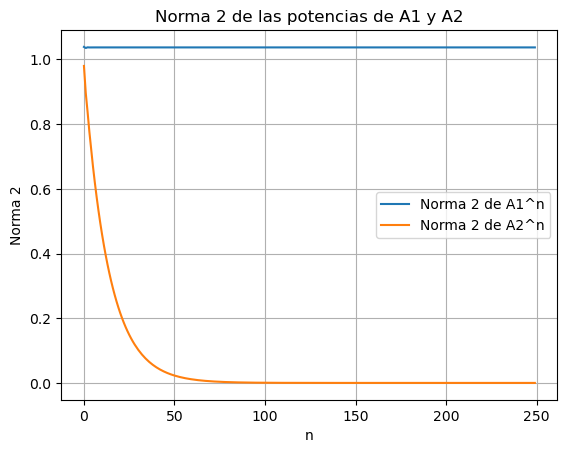

In [9]:
#Grafico:

plt.figure()
plt.plot(a1, label='Norma 2 de A1^n')
plt.plot(a2, label='Norma 2 de A2^n')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

### Consigna 3 -

In [12]:
#Primero definimos una función que realice el método de la potencia aplicando el método de Monte Carlo.

def metodo_potencia_MonteC(A,n):
    autovals_arr = np.zeros(n)

    for i in range (n):
        autovals_arr[i], _ = metodo_potencia(A)

    media = np.mean(autovals_arr)
    desvio_estandar = np.std(autovals_arr)

    return media, desvio_estandar


In [14]:
#Calculo Autovalores de A1 y A2

#A1:
a1, ds1 = metodo_potencia_MonteC(A1,250)
print(f'autovalor más grande de A1 :{a1}')


#A2
a2, ds2 = metodo_potencia_MonteC(A2,250)
print(f'autovalor más grande de A12 :{a2}')

#chequeo
#np.linalg.eigvals(A1)
#np.linalg.eigvals(A2)

autovalor más grande de A1 :1.000000199543123
autovalor más grande de A12 :0.9276516044404501


### Consigna 4 -


In [17]:
#Utilizamos nuevamente las matrices del ejercicio 2:

data1 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
    ]

A1 = np.array(data1)

data2 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
    ]

A2 = np.array(data2)



La ecuacion (4) es : (I − A)^−1 = I + A + A^2 + A^3 + . . . + A^n + . . . (despues lo escribo bien con latex)

In [20]:
#para n = 10
n10 = 10

def serie_de_potencias(A,n): #tal vez ineficiente, pero no me importa juaaaaaaa
    dim=np.shape(A)[0]
    
    v = np.zeros(n)
    e=np.zeros(n)

    L,U,P= calcularLU(np.eye(dim)-A)

    ImenosA_inversa=inversaLU(L, U, P)


    for i in range(n):
        serie= suma_potencias(A,i)
        v[i]=np.linalg.norm(serie, 2)
        e[i]=np.linalg.norm(serie-ImenosA_inversa,2)
    

    return v, e

    
    
def suma_potencias(A,n):
    dim=np.shape(A)[0]
    
    v = np.zeros(n+1)
    I = np.eye(dim)

    if n!=0:
        return elevar_matriz(A,n) + suma_potencias(A,n-1)
    else:
        return I


vA1,errorvA1=serie_de_potencias(A1,n10)

vA2,errorvA2=serie_de_potencias(A2,n10)

vA1_100,errorvA1_100=serie_de_potencias(A1,100)

vA2_100,errorvA2_100=serie_de_potencias(A2,100)

#print(errorvA2_100)



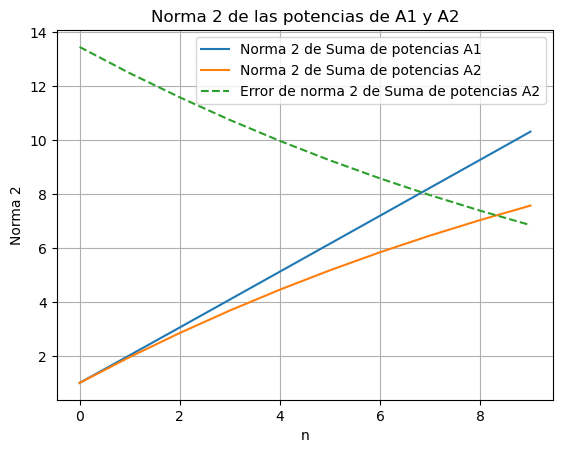

In [21]:
#Grafico para n=10:

plt.figure()
plt.plot(vA1, label='Norma 2 de Suma de potencias A1')
plt.plot(vA2, label='Norma 2 de Suma de potencias A2')
plt.plot(errorvA2, label='Error de norma 2 de Suma de potencias A2',linestyle="--")
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

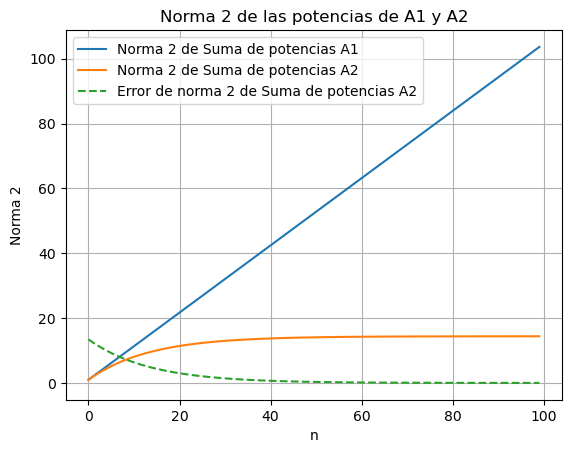

In [24]:
#Grafico para n=100:

plt.figure()
plt.plot(vA1_100, label='Norma 2 de Suma de potencias A1')
plt.plot(vA2_100, label='Norma 2 de Suma de potencias A2')
plt.plot(errorvA2_100, label='Error de norma 2 de Suma de potencias A2',linestyle="--")
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

(b) Podemos obvservar que, mientras que A2 luce converger alrededor del 17, la serie de potencias de A1 diverge. Aumentar el n solo hace que aumente la norma. (c) Con los datos que tenemos, pareciese que la convergencia de la serie de potencias esta relacionado con que la matriz elevada a la n (su norma) tienda a 0 cuando n tiende a infiinito.


###     Consigna 5 -

In [12]:
!pip install openpyxl

In [28]:
import pandas as pd

nombreFile = "matrizlatina2011_compressed_0.xlsx"
archivo = pd.read_excel(nombreFile, sheet_name=1)

p1="SLV"
p2="PAN"

panama = archivo[archivo["Country_iso3"]==p2] #seleccionamos las filas de Panamá

iPP= panama.filter(regex='^PAN', axis=1) #seleccionamos las columas de Panamá

outputP=panama["Output"] #Output es el total producido

output01P= outputP.replace(0,1) #Cambiamos los 0s por los 1s en el vector de produccion total, para luego poder calcular A con la fórmula dada en la 
                                #seccion de coeficientes técnicos. ( A = ZP^-1).

salvador = archivo[archivo["Country_iso3"]==p1] #seleccionamos las filas de El Salvador


iSS= salvador.filter(regex='^SLV', axis=1) #seleccionamos las columas de El Salvador

outputS = salvador["Output"] #Output es el total producido

output01S=outputS.replace(0,1) #Cambiamos los 0s por los 1s en el vector de produccion total, para luego poder calcular A con la fórmula dada en la 
                                #seccion de coeficientes técnicos. ( A = ZP^-1).
def coeficientesTecnicos(Z,P):
    """Recibe la matriz de flujo de capitales y en vector produccion. Devuelve la matriz de coeficientes tecnicos asociada"""
    P= np.diag(P)
    L, U, Per = calcularLU(P)
    P_inv = inversaLU(L, U, Per)
    A =Z@P_inv
    
    return  A

APP = coeficientesTecnicos(iPP, output01P)

ASS= coeficientesTecnicos(iSS, output01S) 



#### Cálculo autovalores de APP y ASS.

In [31]:
#APP:

APP_arr = APP.to_numpy()

a_PP,ds= metodo_potencia_MonteC(APP_arr,250)

print(f'Mayor autovalor de APP: {a_PP}')

#ASS

ASS_arr = ASS.to_numpy()

a_SS,ds= metodo_potencia_MonteC(ASS_arr,250)

print(f'Mayor autovalor de ASS: {a_SS}')

#chequeo
#np.linalg.eigvals(APP)
#np.linalg.eigvals(ASS)

Mayor autovalor de APP: 0.2826561338180102
Mayor autovalor de ASS: 0.2632669957866549


#### Calculamos vectores con la norma de la matriz elevada a i en la posición i y lo graficamos

In [34]:
a1 = vector_generator(APP_arr,250)

a2 = vector_generator(ASS_arr, 250)

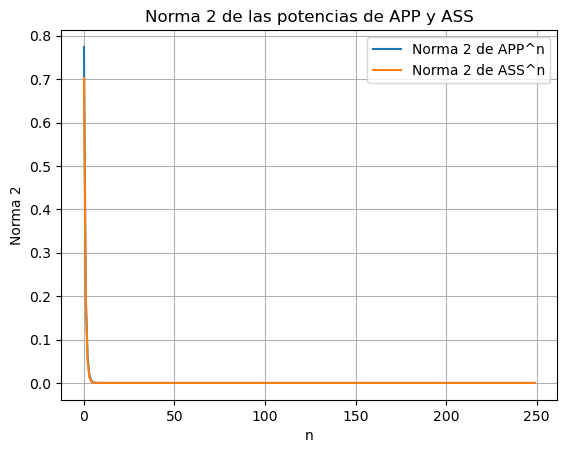

In [36]:
#Grafico de Normas.
plt.figure()
plt.plot(a1, label='Norma 2 de APP^n')
plt.plot(a2, label='Norma 2 de ASS^n')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de APP y ASS')
plt.legend()
plt.grid()
plt.show()

Se puede observar que las las normas de las matrices elevadas tienden a 0 a medida que aumenta el n. Por lo tanto,
según el argumento dado en el Punto 4, la serie de potencias convergerá.

#### Ahora calculamos y graficamos la serie de potencias.

In [40]:
#Primero calculamos los vectores con la serie de potencia hasta n en cada coordenada.

vAPP_100,errorvAPP_100=serie_de_potencias(APP_arr,100)

vASS_100,errorvASS_100=serie_de_potencias(ASS_arr,100)

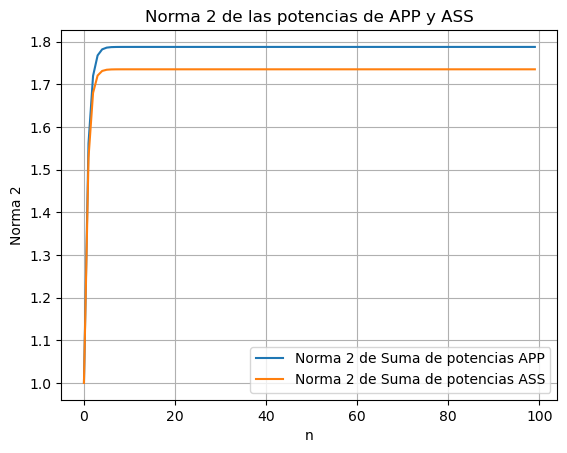

In [41]:
#Grafico:

plt.figure()
plt.plot(vAPP_100, label='Norma 2 de Suma de potencias APP')
plt.plot(vASS_100, label='Norma 2 de Suma de potencias ASS')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de APP y ASS')
plt.legend()
plt.grid()
plt.show()

Se puede observar en el gráfico que la suma de potencias converge.

### Consigan 6 -

### Consigna 7 -

#### Primero normalizamos la matriz ASS y calculamos la matriz de covarianzas.

In [46]:
#Funcion para generar E_n:

def En_generator(n):
    E_n = np.eye(n) - np.ones((n, n)) * (1/n) 

    return E_n

E40 = En_generator(40)

In [58]:
#Normalizamos y calculamos cov.

ASSnorm = E40 @ ASS_arr

C = ASSnorm.T @ ASSnorm /(40-1)

#### Calculamos los dos primeros autovectores utilizando el Algoritmo de Hotelling.

In [61]:
def Hotelling (A, e):
    a1, v1 = metodo_potencia(A, e)

    A_prima = A - a1 * (v1 @ v1.T)
    a2, v2 = metodo_potencia(A_prima, e)

    return a1, v1, a2, v2

#### Ahora utilizamos la función Hotelling en C.

In [70]:
lambda1, v1, lambda2, v2 = Hotelling(C, 0.0001)

print(f'Mayor autovalor de C: {lambda1}')
print(f'Autovector asociado al mayor autovalor de C: {v1}')
print(f'Segundo mayor autovalor de C: {lambda2}')
print(f'Autovector asociado al segundo mayor autovalor de C: {v2}')

#Chequeo:
#print(np.linalg.eigvals(C))
#print(np.linalg.eigvals(C - lambda1 * (v1 @ v1.T)))

Mayor autovalor de C: 0.010395205452638187
Autovector asociado al mayor autovalor de C: [[0.06722221]
 [0.062275  ]
 [0.        ]
 [0.21534241]
 [0.18083087]
 [0.15115728]
 [0.21482747]
 [0.24680771]
 [0.21488154]
 [0.        ]
 [0.12054946]
 [0.11553036]
 [0.27151676]
 [0.09579585]
 [0.19411734]
 [0.38636712]
 [0.23177328]
 [0.18239601]
 [0.30659906]
 [0.16203744]
 [0.12301313]
 [0.09098579]
 [0.08215621]
 [0.07781839]
 [0.09097813]
 [0.        ]
 [0.09760018]
 [0.        ]
 [0.06274784]
 [0.04776606]
 [0.09261751]
 [0.09741572]
 [0.09185113]
 [0.08348569]
 [0.02954226]
 [0.23547566]
 [0.18023116]
 [0.12183649]
 [0.06873131]
 [0.17138674]]
Segundo mayor autovalor de C: 0.0030120160480325963
Autovector asociado al segundo mayor autovalor de C: [[ 0.13113944]
 [-0.02720523]
 [ 0.        ]
 [-0.08301667]
 [ 0.52906608]
 [ 0.33290785]
 [ 0.53589466]
 [ 0.21866999]
 [-0.05556153]
 [ 0.        ]
 [ 0.03016303]
 [-0.04344195]
 [-0.07071715]
 [ 0.27314168]
 [-0.13863089]
 [-0.13959951]
 [-0.1

In [ ]:
# nose como mostrar los vectores de una forma que quede lindo